##### Problem 1. Use the same data as earlier. Build the best MLR model you can. Why do you think yours is best? Make sure you support your choice with plots, written explanation, etc. Include at least three variables, at least one of which should be a dummy variable.

In [6]:
import pandas as pd

SHD = pd.read_csv('../3.02-linear-regression-part-1-lab/data/sacramento_real_estate_transactions_Clean.csv')

im going to create a dummy variable for HUGE houses.  Those whose square footage is 3 standard deviations away from the mean. 
- Mean = 1315
- STD = 853
- Huge Houses > 3775 sq ft




In [14]:
big = []
for home in SHD['sq__ft']:
    if home >= 3775:
        big.append('HUGE')
    else:
        big.append('not huge')

SHD['Huge_homes'] = big

In [18]:
SHD['Huge_homes'] = pd.get_dummies(SHD['Huge_homes'], drop_first = True)

In [20]:
SHD['Huge_homes'].value_counts()

1.0    974
0.0     10
Name: Huge_homes, dtype: int64

In [50]:
# Importing the stats model API
import statsmodels.api as sm

# Setting my X and y for modeling
X = SHD[['sq__ft','beds','baths','Huge_homes']]
y = SHD['price']

# The Default here is Linear Regression,
#we are just specifying the type of Error we want to use for best construction
model = sm.OLS(y,X).fit()


y_pred = model.predict(X)

##### Problem 2. Plot the residuals comparing your MLR model to the true data points.

In [ ]:
#y_pred = model.predict()

SHD['y_pred']=y_pred
SHD['Residuals'] = SHD['price'] - SHD['y_pred']

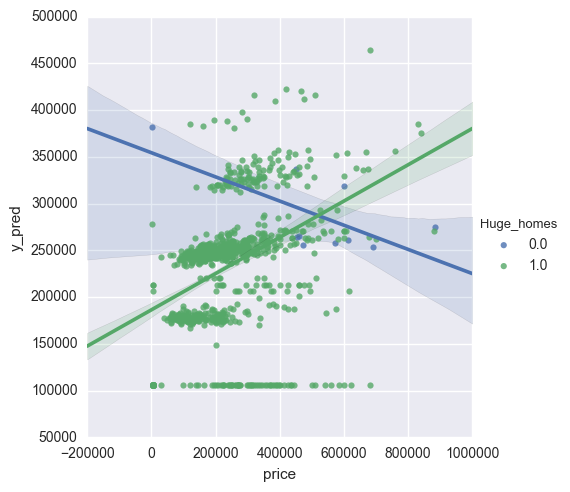

In [52]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x ='price', y = 'y_pred', data = SHD, hue = 'Huge_homes')

##### Problem 3. List the five assumptions for an MLR model. Indicate which ones are the same as the assumptions for an SLR model. 

##### - Linearity: Y must have an approximately linear relationship with each independent X_i.
##### - Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.
##### - Normality: The errors (residuals) follow a Normal distribution.
##### - Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)
- Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j





##### Problem 4. Pick at least two assumptions and articulate whether or not you believe them to be met and why.

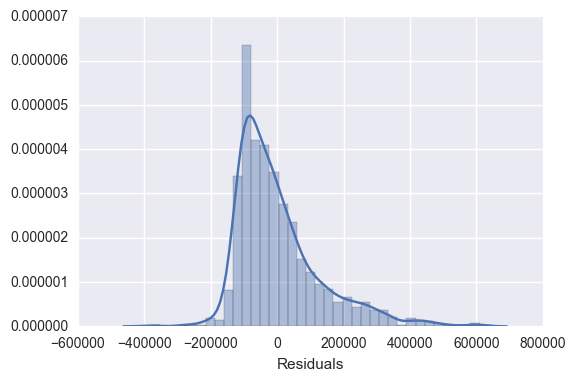

In [54]:
# Normality:  Do the Residual Errors follow a normal distribution.

# I believe all those properties with 0 values are causing the Y intercept to be higher up
# resulting in a less steep slope, thus creating areas where residual error is higher.
sns.distplot(SHD['Residuals'])

The errors are more or less skewed to the right, but do show a slight bit of normality.

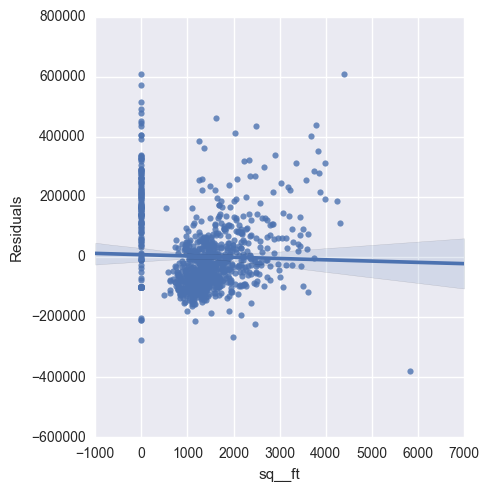

In [56]:
#Equality of variance.  I believe all the observations with 0 sq ft 
# are obscuring the predictive trend so as prices increase error is also going to as well.

sns.lmplot(x = 'sq__ft', y='Residuals', data = SHD)

Those zero square foot properties are causing some havok. Even so, there still seems to be trend.

##### Problem 5. Interpret the y-intercept and at least two of the independent variables.

- Beds: when using number of beds as a variable to determine price, the y intercept of the slope will indicate the base line price expected if a home has 0 bedrooms.

- Baths: when using number of baths as a variable to determine price, the y intercept of the slope will indicate the base line price expected if a home has 0 bathrooms.


##### Problem 6. Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. Write a few sentences interpreting some of the output.

(Hint: scikit-learn does not have this functionality built in, but statsmodels does.)


statsmodel.Model.summary

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     878.3
Date:                Mon, 28 Nov 2016   Prob (F-statistic):          3.36e-322
Time:                        17:57:57   Log-Likelihood:                -12960.
No. Observations:                 984   AIC:                         2.593e+04
Df Residuals:                     980   BIC:                         2.595e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
sq__ft        25.1723      6.730      3.740      0.000        11.965    38.380
beds       -6969.6403   6080.397     -1.146      0.252     -1.89e+04  4962.456
baths       6.421e+04   8565.468      7.496      0.000      4.74e+04   8.1e+04
Huge_homes   1.06e+05   9546.708     11.099      0.000      8.72e+04  1.25e+05
==============================================================================
Omnibus:                      273.826   Durbin-Watson:                   0.464
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              669.273
Skew:                           1.476   Prob(JB):                    4.67e-146
Kurtosis:                       5.758   Cond. No.                     3.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### BONUS. You work for a real estate agency. You are asked to prepare an executive summary for your very busy boss highlighting the most important findings from your MLR model. Convey these findings in no more than two paragraphs. Be sure to briefly address any potential shortcomings of your model.


pwd

u'/Users/General_Assembly/Desktop/DC-DSI-3/curriculum/03-week/3.04-linear-regression-part-2-lab'